In [1]:
#TSNE
#import sklearn
from sklearn.manifold import TSNE
import numpy as np

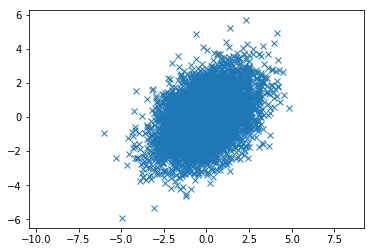

In [2]:
#Generate some Multivariate Gaussian datapoints with a given mean and covariance matrix
mean1 = [0, 0]
cov1 = [[2, 0.8], [0.8, 2]]  # diagonal covariance
import matplotlib.pyplot as plt
%matplotlib inline  
x, y = np.random.multivariate_normal(mean1, cov1, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [18]:
DIM = 3
SCALE = 1
NUMPTSPERCLUSTER=300
numClusters = 10

np.random.seed(100)

X_final = None
labels  = None
for cl in range(0,numClusters):
    corr = np.random.uniform(-1,1,size=(DIM,DIM))
    corr = (corr + corr.T)/2
    np.fill_diagonal(corr, np.ones(DIM))
    sig = np.diag(np.random.uniform(low=0.0, high=1.0, size=DIM) * SCALE)
    mu  = np.ones(DIM)*cl*10
    cov = np.matmul(np.matmul(sig, corr),sig)
    print("Cluser %s" % cl)
    print(cov)
    X   = np.random.multivariate_normal(mu, cov, NUMPTSPERCLUSTER)
    if(X_final is None):
        X_final = X
        labels  = np.ones(NUMPTSPERCLUSTER) * cl
    else:
        X_final = np.vstack((X_final, X))
        labels  = np.append(labels, np.ones(NUMPTSPERCLUSTER)* cl)

Cluser 0
[[ 0.33073234  0.06312357  0.0114616 ]
 [ 0.06312357  0.79445483 -0.00980406]
 [ 0.0114616  -0.00980406  0.04376553]]
Cluser 1
[[  3.37041581e-01  -7.14497990e-02   3.28849637e-02]
 [ -7.14497990e-02   3.03772532e-02   2.31867128e-05]
 [  3.28849637e-02   2.31867128e-05   3.12115286e-02]]
Cluser 2
[[ 0.30786854 -0.24325983  0.22860698]
 [-0.24325983  0.3749658  -0.07361447]
 [ 0.22860698 -0.07361447  0.57407839]]
Cluser 3
[[ 0.02782419  0.02270489 -0.01205019]
 [ 0.02270489  0.11858371  0.00867588]
 [-0.01205019  0.00867588  0.13035479]]
Cluser 4
[[ 0.21926064  0.0247874  -0.36389771]
 [ 0.0247874   0.059442    0.13394041]
 [-0.36389771  0.13394041  0.87205602]]
Cluser 5
[[ 0.00430238 -0.0100016  -0.00594731]
 [-0.0100016   0.11805486  0.07317793]
 [-0.00594731  0.07317793  0.12548812]]
Cluser 6
[[ 0.00554738 -0.01543382 -0.05043842]
 [-0.01543382  0.95772768 -0.55852147]
 [-0.05043842 -0.55852147  0.97762664]]
Cluser 7
[[ 0.82698881  0.17493386  0.02483425]
 [ 0.17493386  0.4

/Users/jvsingh/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:19: RuntimeWarning: covariance is not positive-semidefinite.


In [19]:
print(X_final.shape)
print(labels.shape)
print(labels[0:10])

(3000, 3)
(3000,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [20]:
model = TSNE(n_components=2, random_state=0, perplexity = 30)
#configuring the parameters
# the number of components = 2
# Default perplexity  = 30 
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

%time tsne_data = model.fit_transform(X_final)
# 50 * 10 => 5.64s
#100 * 10 => 12.3s
#200 * 10 => 28.6s


CPU times: user 41.2 s, sys: 3.85 s, total: 45.1 s
Wall time: 45.1 s


In [21]:
#Creating a new data frame which help us in plotting the result data
import pandas as pd
tsne_data_stack = np.append(tsne_data, np.array([labels]).T, axis=1)
tsne_df = pd.DataFrame(data= tsne_data_stack, columns = ("Dim_1", "Dim_2", "label"))

In [22]:
np.array([labels]).T.shape

(3000, 1)

In [23]:
print(type(tsne_data))
tsne_data.shape

<class 'numpy.ndarray'>


(3000, 2)

In [24]:
type(labels)
labels.shape

(3000,)

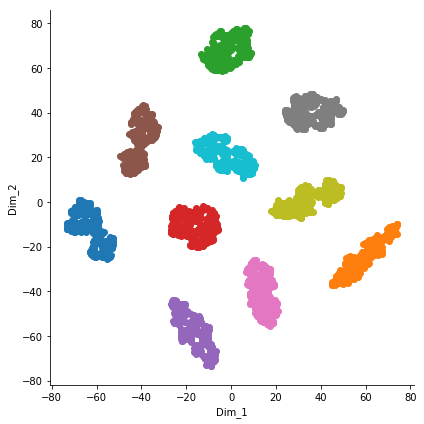

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline  
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2")
plt.show()